# LAB 2 


## A- MÉMORISATION DE FORMES SIMPLES


### Apprentissage incrémental

#### Question 1

On définit les variables `V1`, `V2` et `V3` :

In [32]:
V1 = [1, 1, 1, -1, 1, -1, -1, 1, -1]
V2 = [1, -1, -1, 1, -1, -1, 1, 1, 1]
V3 = [1, 1, 1, 1, -1, -1, 1, 1, 1]  

### Question 2

On définit une fonction pour calculer les poids du réseau selon la règle de Hebb :

In [33]:
import numpy as np

def calculate_hebb_weights(vectors_to_learn):
    # Récupération de la dimension du premier vecteur
    n = len(vectors_to_learn[0])
    
    # Initialisation de la matrice de poids W à zéros
    W = np.zeros((n, n))
    
    # Application de la règle de Hebb
    for v in vectors_to_learn:
        W += np.outer(v, v)
        
    # Mise de la diagonale à 0 (car un neurone n'est pas connecté à lui-même)
    np.fill_diagonal(W, 0)
    
    return W

On calcule les poids du réseau pour mémoriser les formes `V1` et `V2` selon la règle de Hebb :

In [34]:
W = calculate_hebb_weights([np.array(V1), np.array(V2)])
print("Matrice des poids W:")
print(W)

Matrice des poids W:
[[ 0.  0.  0.  0.  0. -2.  0.  2.  0.]
 [ 0.  0.  2. -2.  2.  0. -2.  0. -2.]
 [ 0.  2.  0. -2.  2.  0. -2.  0. -2.]
 [ 0. -2. -2.  0. -2.  0.  2.  0.  2.]
 [ 0.  2.  2. -2.  0.  0. -2.  0. -2.]
 [-2.  0.  0.  0.  0.  0.  0. -2.  0.]
 [ 0. -2. -2.  2. -2.  0.  0.  0.  2.]
 [ 2.  0.  0.  0.  0. -2.  0.  0.  0.]
 [ 0. -2. -2.  2. -2.  0.  2.  0.  0.]]


#### Question 3

On récupère la fonction `my_hopfield` :

In [35]:
import matplotlib.pyplot as plt
import time
from IPython import display

xsize = 3
ysize = 3
n_iter = 10

def my_hopfield(w,v,n_iter,xsize,ysize,verbose):
 # INPUTS:
 # w:   Matrice des poids.
 # v:   Vecteur en entrée de dim 1xN.  
 # n_iter:   nombre d'iterations maximal pour arreter l'évolution du réseau.  
 # xsize,ysize:  les dimensions de la carte (#lignes,#colonnes).  
 # verbose == 1  pour afficher l'évolution du réseau sinon 0 .  
 #    
 # OUTPUTS:
 # out, energy=my_hopfield(w,v,n_iter,xsize,ysize,verbose)
 # out:   output apres n_iter(iterations) 
 # energy:   energy à chaque iteration 
    fig,axarr = plt.subplots(2,1,figsize=(3,3))
    hdisplay = display.display("Réseau Hopfield", display_id=True)

    energy=np.array([])
    energy=np.append(energy,-0.5*v @ w @ v.transpose())    
    visitee=np.array([])
    epoch=0
    txt = "Evolution du réseau..itération No={},Energy={}"
    txt=txt.format(epoch,energy[epoch])
    mycarte(v,axarr[0],txt,hdisplay=hdisplay)
    hdisplay.update(fig)
    while(epoch<n_iter*v.shape[1]):
        net=v@w
        net[net>0]=1
        net[net<0]=-1
        out=net
        idx=(v!=out)*1
        idx=np.where(idx == 1)[1]

        if(idx.size == 0):
            break

        search=1

        while(search):
            update = np.random.randint(0, len(idx), 1)[0]
            if(np.intersect1d(idx[update], visitee).size==0):
                v[0,idx[update]] = -v[0,idx[update]] 
                energy=np.append(energy,-0.5*v @ w @ v.transpose())
                visitee=np.append(visitee,idx[update])
                search=0
                if(verbose==1):              
                    idxpt = np.unravel_index(idx[update], (xsize,ysize))
                    axarr[1].scatter(idxpt[1], idxpt[0], marker="x", color="red", s=100)
                    txt = "Evolution du réseau..itération No={},Energy={}"
                    mycarte(v,axarr[1],txt.format(epoch,energy[epoch]),hdisplay=hdisplay)
                    axarr[1].scatter(idxpt[1], idxpt[0], marker="x", color="white", s=100)
                    hdisplay.update(fig)
                    time.sleep(1)
                idx=np.delete(idx, update)              
            else:
                idx=np.delete(idx, update)
            if(idx.size==0):
                search=0
        epoch=epoch+1
    txt = "Evolution du réseau..itération No={},Energy={}"
    mycarte(v,axarr[1],txt.format(epoch,energy[-1]),hdisplay=hdisplay)
    time.sleep(1)
    hdisplay.update(fig)
    plt.close(fig)
    out=v
    return out,energy


#%% fonction mycarte
#%% une fonction interne pour afficher l'état du réseau sous forme de matrice binaire
def mycarte(vect,ax,titre,hdisplay):
    vect=vect.reshape((xsize,ysize))
    ax.imshow(np.where(vect>=0,1,0),origin='upper',cmap="Greys",interpolation='nearest')
    ax.imshow(np.where(vect>=0,1,0),origin='upper',cmap="Greys",interpolation='nearest')
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
    ax.set_title(titre, fontsize=9,color='blue')

On vérifie à présent la matrice de poids en injectant dans le réseau les formes mémorisées `V1` et `V2` avec les fonctions définies précédemment :

--- Test de V1 ---


'Réseau Hopfield'

Entrée V1: [[ 1  1  1 -1  1 -1 -1  1 -1]]
Sortie V1: [[ 1  1  1 -1  1 -1 -1  1 -1]]
Résultat: V1 est stable. Mémorisation réussie.

--- Test de V2 ---


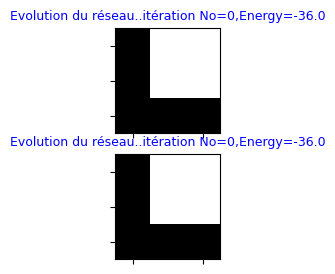

Entrée V2: [[ 1 -1 -1  1 -1 -1  1  1  1]]
Sortie V2: [[ 1 -1 -1  1 -1 -1  1  1  1]]
Résultat: V2 est stable. Mémorisation réussie.


In [36]:
V1_2d = np.array(V1).reshape(1, -1)
V2_2d = np.array(V2).reshape(1, -1)

print("--- Test de V1 ---")
out_v1, energy_v1 = my_hopfield(W, V1_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V1:", V1_2d)
print("Sortie V1:", out_v1)
if np.array_equal(out_v1, V1_2d):
    print("Résultat: V1 est stable. Mémorisation réussie.")
else:
    print("Résultat: V1 N'EST PAS stable.")

print("\n--- Test de V2 ---")
out_v2, energy_v2 = my_hopfield(W, V2_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V2:", V2_2d)
print("Sortie V2:", out_v2)
if np.array_equal(out_v2, V2_2d):
    print("Résultat: V2 est stable. Mémorisation réussie.")
else:
    print("Résultat: V2 N'EST PAS stable.")

#### Question 4

On injecte la forme `V3` qui n' a pas encore été mémorisée :

In [37]:
V3_2d = np.array(V3).reshape(1, -1)

# On injecte V3_2d.copy() dans le réseau qui ne connaît que V1 et V2
out_v3, energy_v3 = my_hopfield(W, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("\nEntrée V3 (non mémorisée):", V3_2d)
print("Sortie du réseau:", out_v3)

# Analyse du résultat
print("\n--- Analyse de la sortie ---")
if np.array_equal(out_v3, V1_2d):
    print("Résultat: Le réseau a convergé vers V1.")
elif np.array_equal(out_v3, V2_2d):
    print("Résultat: Le réseau a convergé vers V2.")
elif np.array_equal(out_v3, V3_2d):
    print("Résultat: Le réseau a convergé vers V3.")
else:
    print("Résultat: Le réseau a convergé vers un autre état.")

'Réseau Hopfield'


Entrée V3 (non mémorisée): [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie du réseau: [[ 1 -1 -1  1 -1 -1  1  1  1]]

--- Analyse de la sortie ---
Résultat: Le réseau a convergé vers V2.


Oui, ce résultat était prévisible. Le réseau de Hopfield est une mémoire auto-associative qui fait converger une entrée vers l'état stable (mémorisé) le plus proche.

La forme V3 (non mémorisée) a une distance de Hamming de 4 avec V1 mais de seulement 2 avec V2. Le réseau a donc "associé" l'entrée V3 à la forme mémorisée V2, la traitant comme une version bruitée de V2.

### Mémorisez la forme V3

#### Question 1

--- Nouvelle matrice W_123 (V1+V2+V3) calculée ---
[[ 0.  1.  1.  1. -1. -3.  1.  3.  1.]
 [ 1.  0.  3. -1.  1. -1. -1.  1. -1.]
 [ 1.  3.  0. -1.  1. -1. -1.  1. -1.]
 [ 1. -1. -1.  0. -3. -1.  3.  1.  3.]
 [-1.  1.  1. -3.  0.  1. -3. -1. -3.]
 [-3. -1. -1. -1.  1.  0. -1. -3. -1.]
 [ 1. -1. -1.  3. -3. -1.  0.  1.  3.]
 [ 3.  1.  1.  1. -1. -3.  1.  0.  1.]
 [ 1. -1. -1.  3. -3. -1.  3.  1.  0.]]

--- Test de V3 (maintenant mémorisée) ---


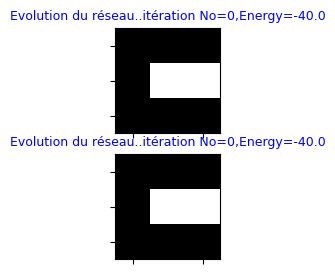

Entrée V3: [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie V3 (nouvelle matrice): [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: V3 est maintenant stable. Mémorisation incrémentale réussie.


In [38]:
# On re-définit les vecteurs 1D pour le calcul
V1_1d = np.array(V1)
V2_1d = np.array(V2)
V3_1d = np.array(V3)

# Calcul de la matrice de poids pour V3
W_V3 = calculate_hebb_weights([V3_1d])

# Apprentissage incrémental 
W_123 = W + W_V3

print("--- Nouvelle matrice W_123 (V1+V2+V3) calculée ---")
print(W_123)

# Confirmation de la validité en réinjectant V3
print("\n--- Test de V3 (maintenant mémorisée) ---")

out_v3_new, energy_v3_new = my_hopfield(W_123, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V3:", V3_2d)
print("Sortie V3 (nouvelle matrice):", out_v3_new)

# Analyse
if np.array_equal(out_v3_new, V3_2d):
    print("Résultat: V3 est maintenant stable. Mémorisation incrémentale réussie.")
else:
    print("Résultat: Échec ! Le réseau a convergé vers un autre état.")

Il y a 0 itération et la sortie est parfaitement identique à l'entrée, ce qui confirme que `V3`  est devenu un nouvel état stable du résseau.

#### Question 2

--- Test de V3 (après désapprentissage) ---


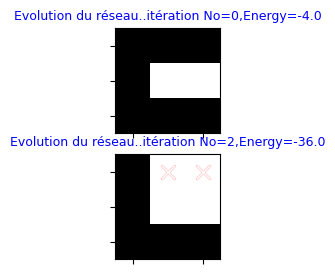

Entrée V3: [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie du réseau (après désapprentissage): [[ 1 -1 -1  1 -1 -1  1  1  1]]
Résultat: Le réseau converge à nouveau vers V2. Désapprentissage réussi !

Vérification de la matrice :
La matrice W_12_desappris est identique à la matrice W originale (V1, V2).


In [39]:
# Désapprentissage en partant de W_123 qui connaît les 3 formes
W_12_desappris = W_123 - W_V3

# Confirmeation en réinjectant V3
print("--- Test de V3 (après désapprentissage) ---")

out_v3_des, energy_v3_des = my_hopfield(W_12_desappris, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V3:", V3_2d)
print("Sortie du réseau (après désapprentissage):", out_v3_des)

# --- Analyse ---
if np.array_equal(out_v3_des, V2_2d):
    print("Résultat: Le réseau converge à nouveau vers V2. Désapprentissage réussi !")
elif np.array_equal(out_v3_des, V3_2d):
    print("Résultat: Échec ! V3 est toujours un état stable.")
else:
    print("Résultat: Le réseau a convergé vers un autre état.")

# Vérification que W_12_desappris est identique à la matrice W d'origine
print("\nVérification de la matrice :")
if np.array_equal(W, W_12_desappris):
    print("La matrice W_12_desappris est identique à la matrice W originale (V1, V2).")
else:
    print("Les matrices ne sont pas identiques.")

#### Question 3

L'apprentissage incrémental présente deux principaux avantages par rapport aux autres formes d'apprentissage :
- Efficacité (vitesse) : C'est l'avantage principal. Pour ajouter une forme, il suffit de calculer le produit extérieur de la nouvelle forme (O(N2)) et de l'ajouter à la matrice W existante. "L'autre forme d'apprentissage" (l'apprentissage batch) consisterait à recalculer toute la matrice W depuis le début avec tous les vecteurs (V1, V2, et V3), ce qui serait beaucoup plus long, surtout si le réseau a déjà mémorisé des milliers de formes.
- Adaptabilité (Flexibilité) : Le réseau peut apprendre (ou désapprendre) de nouvelles informations "à la volée" sans avoir besoin de revoir toutes les données qu'il a déjà apprises. Il n'a pas besoin de garder en mémoire les formes V1 et V2 pour apprendre V3 ; il n'a besoin que de la matrice W actuelle et de la nouvelle forme V3.

### États stables

#### Question 1

Injection de la forme X dans le réseau W_123 (V1, V2, V3)...
Forme X: [[ 1 -1  1  1 -1 -1  1  1  1]]
------------------------------
Essai 1:


'Réseau Hopfield'

Sortie de l'essai 1: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.

Essai 2:


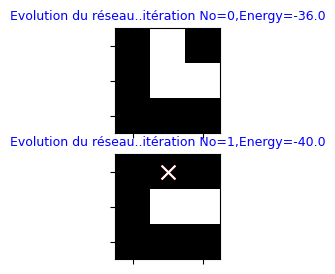

Sortie de l'essai 2: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.

Essai 3:


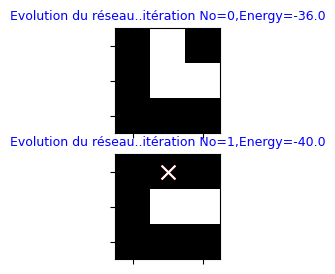

Sortie de l'essai 3: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.



In [40]:
# Définition de la forme X
X_list = [1, -1, 1, 1, -1, -1, 1, 1, 1]
X_2d = np.array([X_list])

print("Injection de la forme X dans le réseau W_123 (V1, V2, V3)...")
print("Forme X:", X_2d)
print("-" * 30)

# On réalise quelques essais
for i in range(3):
    print(f"Essai {i+1}:")
    out_X, energy_X = my_hopfield(W_123, X_2d.copy(), n_iter, xsize, ysize, 1)
    
    print(f"Sortie de l'essai {i+1}:", out_X)
    
    # Analyse de la sortie
    if np.array_equal(out_X, V1_2d):
        print("Résultat: Le réseau a convergé vers V1.\n")
    elif np.array_equal(out_X, V2_2d):
        print("Résultat: Le réseau a convergé vers V2.\n")
    elif np.array_equal(out_X, V3_2d):
        print("Résultat: Le réseau a convergé vers V3.\n")
    else:
        print("Résultat: Le réseau a convergé vers un autre état (inconnu ou parasite).\n")

Le résultat peut être différent d'une fois à l'autre à cause du mode de mise à jour asynchrone et aléatoire utilisé par la fonction `my_hopfield`. En effet, plutôt que de calculer l'état de tous les neurones et de les mettre à jour tous en même temps (mode synchrone), cette fonction identifie d'abord tous les neurones "instables" (ceux qui veulent changer d'état). Ensuite, elle en choisit un au hasard dans cette liste pour le mettre à jour. Enfin, une forme d'entrée (comme X) peut être "à mi-chemin" entre deux ou plusieurs états mémorisés (`V1`, `V2`, ou `V3`). Le tout premier neurone qui bascule (choisi au hasard) peut faire "pencher la balance" et entraîner le réseau dans un "bassin d'attraction" différent.

#### Question 2

On écrit une fonction qui calcule la distance de Hamming entre deux vecteurs binaires :

In [41]:
def hd(v1, v2):
    v1_arr = np.array(v1).flatten()
    v2_arr = np.array(v2).flatten()
    return np.sum(v1_arr != v2_arr)

Voici quelques exemples d'utilisation (pour vérifier l'analyse à la question 1) :

In [42]:
X_1d = np.array(X_list) 
V1_1d = np.array(V1)
V2_1d = np.array(V2)
V3_1d = np.array(V3)

print(f"Distance de Hamming entre X et V1: {hd(X_1d, V1_1d)}")
print(f"Distance de Hamming entre X et V2: {hd(X_1d, V2_1d)}")
print(f"Distance de Hamming entre X et V3: {hd(X_1d, V3_1d)}")

Distance de Hamming entre X et V1: 5
Distance de Hamming entre X et V2: 1
Distance de Hamming entre X et V3: 1


#### Question 3

In [43]:
# Définition de la forme Y
Y_list = [-1, -1, -1, 1, 1, 1, -1, -1, -1]
Y_1d = np.array(Y_list)

# Utilisation de la fonction hd() pour calculer les distances
dist_Y_V1 = hd(Y_1d, V1_1d)
dist_Y_V2 = hd(Y_1d, V2_1d)
dist_Y_V3 = hd(Y_1d, V3_1d)

print(f"Distance de Hamming entre Y et V1: {dist_Y_V1}")
print(f"Distance de Hamming entre Y et V2: {dist_Y_V2}")
print(f"Distance de Hamming entre Y et V3: {dist_Y_V3}")

Distance de Hamming entre Y et V1: 6
Distance de Hamming entre Y et V2: 6
Distance de Hamming entre Y et V3: 8


La forme `Y` est à égale distance des états stables `V1` et `V2`, et plus éloignée de `V3`. Par conséquent, le réseau devrait converger soit vers `V1` soit vers `V2`. Le résultat final dépendra de l'ordre aléatiore dans lequel les neurones instables seront mis à jour.

#### Question 4

On injecte `Y` dans le réseau `W0` afin de verifier notre résultat avec `my_hopfield()` :

--- Test de Y (non mémorisée) ---
Entrée Y: [[-1 -1 -1  1  1  1 -1 -1 -1]]
------------------------------
Essai 1:


'Réseau Hopfield'

Sortie de l'essai 1: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.

Essai 2:


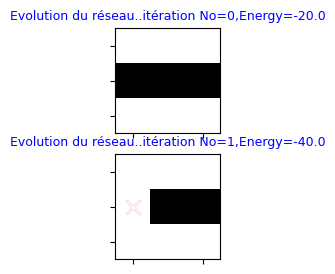

Sortie de l'essai 2: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.

Essai 3:


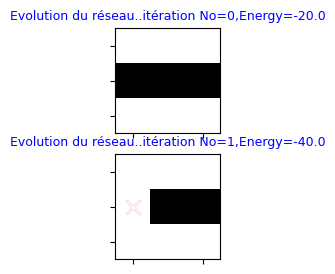

Sortie de l'essai 3: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.



In [44]:
# On prépare la forme Y en 2D (1,9) pour la fonction my_hopfield
Y_2d = np.array([Y_list])

print("--- Test de Y (non mémorisée) ---")
print("Entrée Y:", Y_2d)
print("-" * 30)

# On réalise quelques essais pour vérifier la prédiction
for i in range(3):
    print(f"Essai {i+1}:")
    out_Y, energy_Y = my_hopfield(W_123, Y_2d.copy(), n_iter, xsize, ysize, 1)
    
    print(f"Sortie de l'essai {i+1}:", out_Y)
    
    # Analyse de la sortie
    if np.array_equal(out_Y, V1_2d):
        print("Résultat: Le réseau a convergé vers V1. Prédiction confirmée.\n")
    elif np.array_equal(out_Y, V2_2d):
        print("Résultat: Le réseau a convergé vers V2. Prédiction confirmée.\n")
    elif np.array_equal(out_Y, V3_2d):
        print("Résultat: Le réseau a convergé vers V3 (Inattendu).\n")
    else:
        print("Résultat: Le réseau a convergé vers un autre état.\n")

La forme `Y` est sur une "ligne de crête" énergétique, à égale distance entre les "vallées" (bassins d'attraction) de `V1` et `V2`.

Au lieu de "tomber" d'un côté ou de l'autre, le processus de mise à jour aléatoire a fait converger le réseau vers une troisième "cuvette" plus petite, qui n'avait pas été mémorisée.

C'est en fait un état parasite (ou état stable parasite).

#### Question 5

On calcule la matrice de poids pour mémoriser `V1`, `V2` et le complément de `V3` :

In [45]:
# Calcul du complément de V3
V3_comp_1d = -V3_1d
V3_comp_2d = np.array([V3_comp_1d]) # Version 2D pour my_hopfield

print("Forme V1:", V1_1d)
print("Forme V2:", V2_1d)
print("Forme V3 Complément:", V3_comp_1d)

# Calcul de la nouvelle matrice de poids
W_12_3comp = calculate_hebb_weights([V1_1d, V2_1d, V3_comp_1d])
print("\n--- Nouvelle matrice W_12_3comp (V1, V2, V3_comp) calculée ---")

# Prédiction de la convergence de Y
print("\n--- Prédiction pour Y ---")
dist_Y_V1 = hd(Y_1d, V1_1d)
dist_Y_V2 = hd(Y_1d, V2_1d)
dist_Y_V3comp = hd(Y_1d, V3_comp_1d)

print(f"Distance de Hamming (Y, V1) = {dist_Y_V1}")
print(f"Distance de Hamming (Y, V2) = {dist_Y_V2}")
print(f"Distance de Hamming (Y, V3_comp) = {dist_Y_V3comp}")

# Vérification de la convergence de Y
print("\n--- Test de Y sur la nouvelle matrice ---")
print("Entrée Y:", Y_2d)

out_Y_new, energy_Y_new = my_hopfield(W_12_3comp, Y_2d.copy(), n_iter, xsize, ysize, 1)

print("\nSortie du réseau:", out_Y_new)

# Comparaison avec la question 4
print("\n--- Analyse et Comparaison ---")
if np.array_equal(out_Y_new, V3_comp_2d):
    print("Résultat: Le réseau a convergé vers V3_comp. Prédiction confirmée.")
else:
    print("Résultat: Le réseau n'a PAS convergé vers V3_comp.")

Forme V1: [ 1  1  1 -1  1 -1 -1  1 -1]
Forme V2: [ 1 -1 -1  1 -1 -1  1  1  1]
Forme V3 Complément: [-1 -1 -1 -1  1  1 -1 -1 -1]

--- Nouvelle matrice W_12_3comp (V1, V2, V3_comp) calculée ---

--- Prédiction pour Y ---
Distance de Hamming (Y, V1) = 6
Distance de Hamming (Y, V2) = 6
Distance de Hamming (Y, V3_comp) = 1

--- Test de Y sur la nouvelle matrice ---
Entrée Y: [[-1 -1 -1  1  1  1 -1 -1 -1]]


'Réseau Hopfield'


Sortie du réseau: [[-1 -1 -1 -1  1  1 -1 -1 -1]]

--- Analyse et Comparaison ---
Résultat: Le réseau a convergé vers V3_comp. Prédiction confirmée.


À la question 4, `Y` convergeait vers un état parasite. En mémorisant le complément de `V3`, nous avons modifié le "paysage énergétique" du réseau. L'entrée `Y`, qui se trouvait auparavant dans un minimum local (état parasite), est maintenant très proche (distance 1) du nouvel état stable `V3_comp` et y converge.

### États parasites

#### Question 1

On charge les caractères OCR-A dans l'espace de travail :

In [46]:
import scipy.io

# Chargement des caractères OCR-A
xsize_ocr = 12
ysize_ocr = 10
n_iter_ocr = 20

ocra = scipy.io.loadmat('ocra.mat')
zero = ocra.get('zero')
un = ocra.get('un')
sept = ocra.get('sept')
huit = ocra.get('huit')
noisy = ocra.get('noisy')

# Création de la matrice data
data = np.vstack((zero, un, sept, huit))

# Affichage de la structure des données
print("Dimensions des caractères chargés:")
print(f"zero: {zero.shape}")
print(f"un: {un.shape}")
print(f"sept: {sept.shape}")
print(f"huit: {huit.shape}")
print(f"noisy: {noisy.shape}")

Dimensions des caractères chargés:
zero: (1, 120)
un: (1, 120)
sept: (1, 120)
huit: (1, 120)
noisy: (1, 120)


On crée aussi une fonction `my_show` pour afficher les caractères sous forme de matrices binaires :

Caractère 'zero':


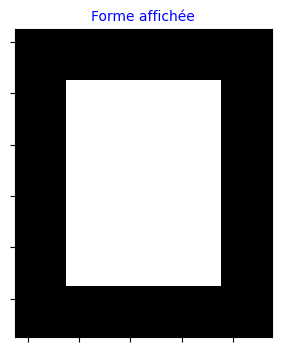


Caractère 'un':


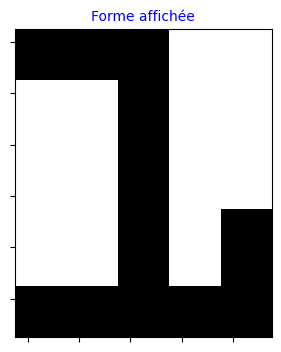


Caractère 'sept':


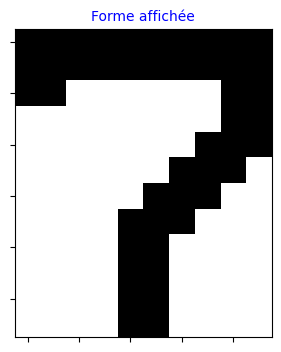


Caractère 'huit':


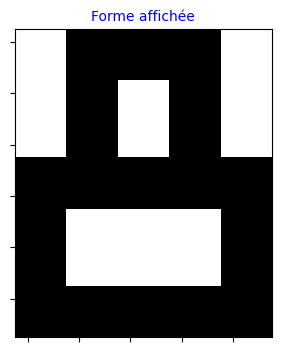


Caractère 'noisy':


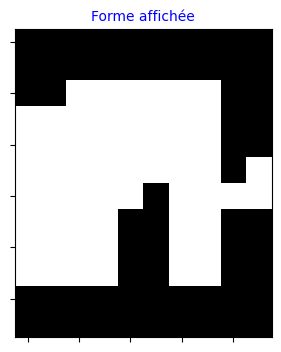

In [47]:
# Fonction pour afficher une forme
def my_show(forme, ysize, xsize):
    # MATLAB stocke en column-major, on reshape 
    forme_reshaped = forme.reshape((xsize, ysize))
    plt.figure(figsize=(4, 4))
    plt.imshow(np.where(forme_reshaped >= 0, 1, 0), origin='upper', cmap="Greys", interpolation='nearest')
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title("Forme affichée", fontsize=10, color='blue')
    plt.show()

# Affichage des caractères chargés
print("Caractère 'zero':")
my_show(zero, ysize_ocr, xsize_ocr)

print("\nCaractère 'un':")
my_show(un, ysize_ocr, xsize_ocr)

print("\nCaractère 'sept':")
my_show(sept, ysize_ocr, xsize_ocr)

print("\nCaractère 'huit':")
my_show(huit, ysize_ocr, xsize_ocr)

print("\nCaractère 'noisy':")
my_show(noisy, ysize_ocr, xsize_ocr)

#### Question 2

On calcule les poids requis pour mémoriser les formes zero, un, sept et huit :

Matrice de poids calculée pour mémoriser zero, un, sept et huit
Dimensions de la matrice de poids: (120, 120)

Vérification des états stables


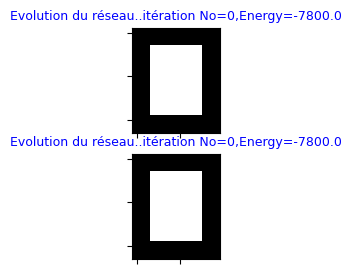

Zero stable: True


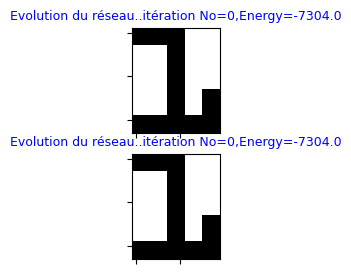

Un stable: True


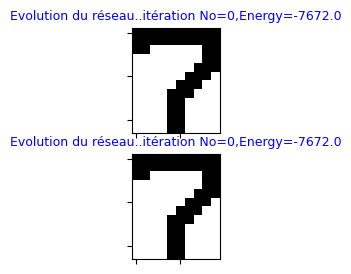

Sept stable: True


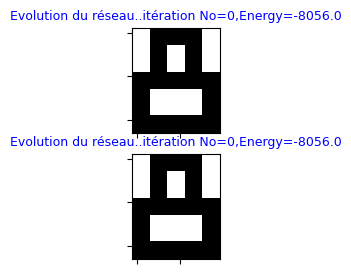

Huit stable: True


In [48]:
# Mise à jour des dimensions globales pour my_hopfield
xsize = xsize_ocr
ysize = ysize_ocr

# Aplatissement des formes en vecteurs 1D
zero_1d = zero.flatten()
un_1d = un.flatten()
sept_1d = sept.flatten()
huit_1d = huit.flatten()

# Calcul de la matrice de poids pour mémoriser les 4 caractères
poids = calculate_hebb_weights([zero_1d, un_1d, sept_1d, huit_1d])

print("Matrice de poids calculée pour mémoriser zero, un, sept et huit")
print(f"Dimensions de la matrice de poids: {poids.shape}")

# Vérification que les formes mémorisées sont stables
print("\nVérification des états stables")

# Test de zero
zero_2d = zero.reshape(1, -1)
out_zero, _ = my_hopfield(poids, zero_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
print(f"Zero stable: {np.array_equal(out_zero, zero_2d)}")

# Test de un
un_2d = un.reshape(1, -1)
out_un, _ = my_hopfield(poids, un_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
print(f"Un stable: {np.array_equal(out_un, un_2d)}")

# Test de sept
sept_2d = sept.reshape(1, -1)
out_sept, _ = my_hopfield(poids, sept_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
print(f"Sept stable: {np.array_equal(out_sept, sept_2d)}")

# Test de huit
huit_2d = huit.reshape(1, -1)
out_huit, _ = my_hopfield(poids, huit_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
print(f"Huit stable: {np.array_equal(out_huit, huit_2d)}")

#### Question 3

Pour prédire vers quel caractère devrait converger le réseau si on lui fournit la forme `noisy` en entrée, on calcule la distance de Hamming entre `noisy` et chaque caractère mémorisé :

In [49]:
# Conversion de noisy en vecteur 1D
noisy_1d = noisy.flatten()

# Calcul des distances de Hamming
dist_noisy_zero = hd(noisy_1d, zero_1d)
dist_noisy_un = hd(noisy_1d, un_1d)
dist_noisy_sept = hd(noisy_1d, sept_1d)
dist_noisy_huit = hd(noisy_1d, huit_1d)

print("Distances de Hamming entre 'noisy' et les caractères mémorisés")
print(f"Distance (noisy, zero) = {dist_noisy_zero}")
print(f"Distance (noisy, un)   = {dist_noisy_un}")
print(f"Distance (noisy, sept) = {dist_noisy_sept}")
print(f"Distance (noisy, huit) = {dist_noisy_huit}")

# Détermination du caractère le plus proche
distances = {
    'zero': dist_noisy_zero,
    'un': dist_noisy_un,
    'sept': dist_noisy_sept,
    'huit': dist_noisy_huit
}

caractere_proche = min(distances, key=distances.get)
print(f"\n--- Prédiction ---")
print(f"Le caractère le plus proche de 'noisy' est: '{caractere_proche}' avec une distance de {distances[caractere_proche]}")
print(f"Le réseau devrait donc converger vers '{caractere_proche}'.")

Distances de Hamming entre 'noisy' et les caractères mémorisés
Distance (noisy, zero) = 24
Distance (noisy, un)   = 26
Distance (noisy, sept) = 28
Distance (noisy, huit) = 58

--- Prédiction ---
Le caractère le plus proche de 'noisy' est: 'zero' avec une distance de 24
Le réseau devrait donc converger vers 'zero'.


#### Question 4

On injecte maintenant noisy dans le réseau via l'appel de my_hopfield() pour vérifier la prédiction :

Test de 'noisy' dans le réseau
Injection de 'noisy' dans le réseau



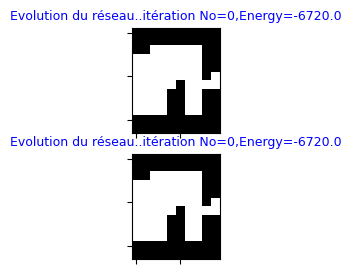


Analyse du résultat
Entrée: noisy
Sortie du réseau:
Le réseau a convergé vers un ÉTAT PARASITE (non mémorisé)!

Caractère résultant:


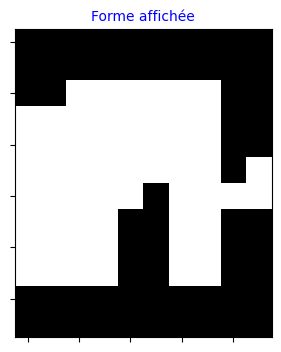

In [50]:
# Mise à jour des dimensions globales pour my_hopfield
xsize = xsize_ocr
ysize = ysize_ocr
n_iter = n_iter_ocr

# Préparation de noisy en format 2D pour my_hopfield
noisy_1d = noisy.flatten()
noisy_2d = noisy_1d.reshape(1, -1)

print("Test de 'noisy' dans le réseau")
print("Injection de 'noisy' dans le réseau\n")

# Injection de noisy dans le réseau
out_noisy, energy_noisy = my_hopfield(poids, noisy_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)

print("\nAnalyse du résultat")
print(f"Entrée: noisy")
print(f"Sortie du réseau:")

# Comparaison avec les caractères mémorisés
if np.array_equal(out_noisy, zero_2d):
    print("Le réseau a convergé vers 'zero'. Prédiction confirmée!" if caractere_proche == 'zero' else "Le réseau a convergé vers 'zero'. Prédiction incorrecte.")
elif np.array_equal(out_noisy, un_2d):
    print("Le réseau a convergé vers 'un'. Prédiction confirmée!" if caractere_proche == 'un' else "Le réseau a convergé vers 'un'. Prédiction incorrecte.")
elif np.array_equal(out_noisy, sept_2d):
    print("Le réseau a convergé vers 'sept'. Prédiction confirmée!" if caractere_proche == 'sept' else "Le réseau a convergé vers 'sept'. Prédiction incorrecte.")
elif np.array_equal(out_noisy, huit_2d):
    print("Le réseau a convergé vers 'huit'. Prédiction confirmée!" if caractere_proche == 'huit' else "Le réseau a convergé vers 'huit'. Prédiction incorrecte.")
else:
    print("Le réseau a convergé vers un ÉTAT PARASITE (non mémorisé)!")

# Affichage du résultat final
print("\nCaractère résultant:")
my_show(out_noisy, ysize_ocr, xsize_ocr)

**Observation :** 

Si le réseau converge vers un état parasite plutôt que vers le caractère prédit, cela démontre que `noisy` se trouve dans un bassin d'attraction d'un minimum local (état parasite) plutôt que dans celui d'un des caractères mémorisés. 

Cet état parasite résulte d'une combinaison linéaire impaire des formes mémorisées, comme mentionné dans la note théorique. Ce résultat indique la présence d'un minimum local dans le paysage énergétique.

#### Question 5

On détermine le nombre maximal d'états stables dans le réseau. Avec 4 formes mémorisées (`zero`, `un`, `sept`, `huit`), le réseau possède :

In [51]:
import math

# Nombre de formes mémorisées
p = 4

# 1. États stables mémorisés
etats_memorises = p
print(f"1. États stables mémorisés: {etats_memorises}")
print(f"   (zero, un, sept, huit)")

# 2. Compléments des formes mémorisées
etats_complements = p
print(f"\n2. Compléments des formes mémorisées: {etats_complements}")
print(f"   (-zero, -un, -sept, -huit)")

# 3. États parasites: combinaisons linéaires impaires
# On calcule toutes les combinaisons impaires (1, 3, 5, ..., p)
# Une forme ne peut engendrer d'état parasite avec son complément

# Combinaisons de 3 formes parmi 4
etats_parasites_base = math.comb(p, 3)  # C(4,3) = 4
print(f"\n3. États parasites (combinaisons de 3 formes): C(4,3) = {etats_parasites_base}")

# Chaque état parasite a aussi son complément
etats_parasites_complements = etats_parasites_base
print(f"   Compléments de ces états parasites: {etats_parasites_complements}")

# Total des états parasites
etats_parasites_total = etats_parasites_base + etats_parasites_complements
print(f"   Total des états parasites: {etats_parasites_total}")

# 4. Total des états stables
total_etats_stables = etats_memorises + etats_complements + etats_parasites_total

print(f"NOMBRE MAXIMAL D'ÉTATS STABLES DANS LE RÉSEAU: {total_etats_stables}")

1. États stables mémorisés: 4
   (zero, un, sept, huit)

2. Compléments des formes mémorisées: 4
   (-zero, -un, -sept, -huit)

3. États parasites (combinaisons de 3 formes): C(4,3) = 4
   Compléments de ces états parasites: 4
   Total des états parasites: 8
NOMBRE MAXIMAL D'ÉTATS STABLES DANS LE RÉSEAU: 16


Détail:
  - 4 formes mémorisées
  - 4 compléments des formes mémorisées
  - 4 états parasites (combinaisons de 3 formes)
  - 4 compléments des états parasites
  Total = 16 états stables maximum

**Justification :** Pour $p$ formes mémorisées, le nombre d'états stables parasites est donné par toutes les combinaisons linéaires d'un nombre **impair** de formes. Avec 4 formes, on a :
- Combinaisons de 1 forme : déjà comptées dans les formes mémorisées
- Combinaisons de 3 formes : $\binom{4}{3} = 4$ états parasites + leurs 4 compléments = 8 états parasites

Note : Une forme ne peut engendrer d'état parasite avec son complément, donc on ne compte pas les combinaisons de 2 formes (nombre pair) ni les combinaisons de 4 formes (nombre pair).

#### Question 6

On tente maintenant de faire désapprendre au réseau l'état parasite `noisy` par dilution neuronale. Le principe consiste à soustraire une fraction de la matrice de poids de l'état parasite :

$$W_{nouveau} = W_{formes} - \alpha \cdot W_{parasite}$$

où $\alpha \in [0,1]$ est la portion d'état parasite à soustraire (déterminée par essai/erreur).

--- Tentative de dilution neuronale ---
État parasite détecté (résultat de la question 4)
On va tester différentes valeurs de alpha pour éliminer cet état parasite.


------------------------------------------------------------
Test avec alpha = 0.1

1. Test de 'noisy' (l'état parasite):


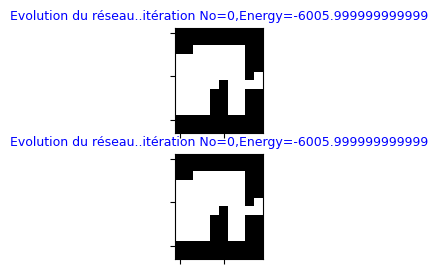

   Converge toujours vers un état parasite

2. Vérification des états stables mémorisés:


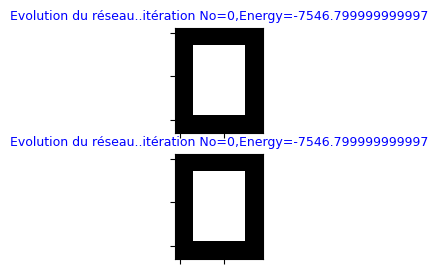

   'zero' :  Stable


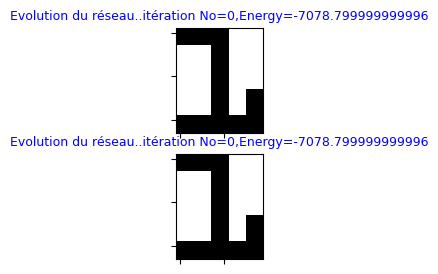

   'un'   :  Stable


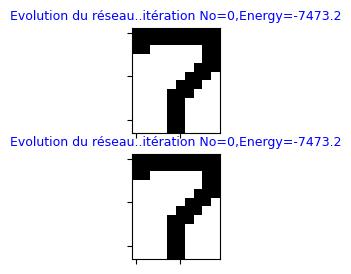

   'sept' :  Stable


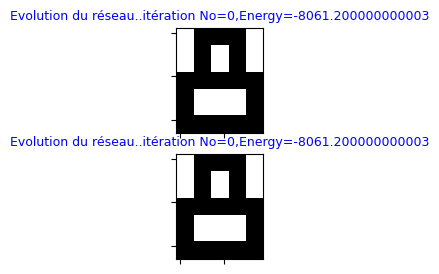

   'huit' :  Stable

   Résumé:
   - États mémorisés préservés:  OUI
   - État parasite éliminé:  NON

------------------------------------------------------------
Test avec alpha = 0.3

1. Test de 'noisy' (l'état parasite):


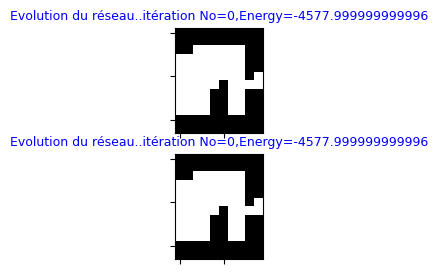

   Converge toujours vers un état parasite

2. Vérification des états stables mémorisés:


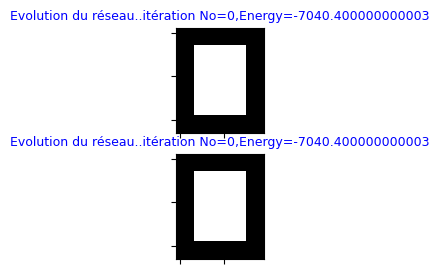

   'zero' :  Stable


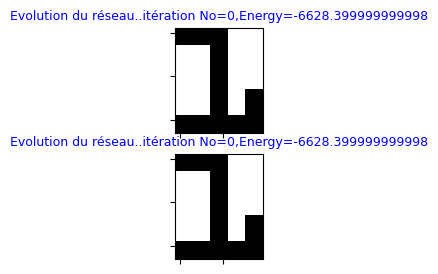

   'un'   :  Stable


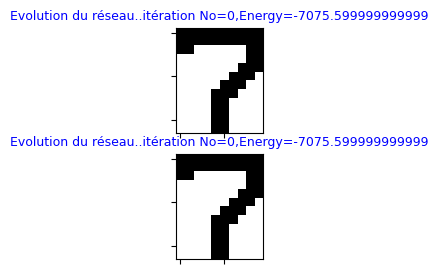

   'sept' :  Stable


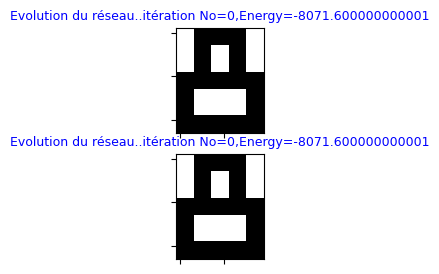

   'huit' :  Stable

   Résumé:
   - États mémorisés préservés:  OUI
   - État parasite éliminé:  NON

------------------------------------------------------------
Test avec alpha = 0.5

1. Test de 'noisy' (l'état parasite):


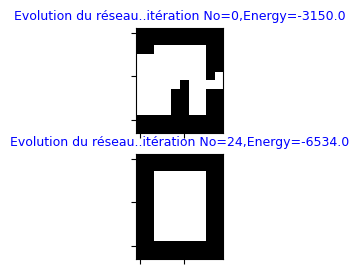

   Converge vers 'zero'

2. Vérification des états stables mémorisés:


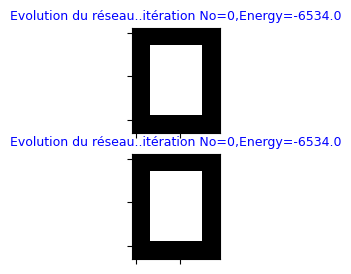

   'zero' :  Stable


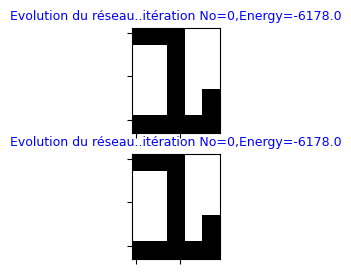

   'un'   :  Stable


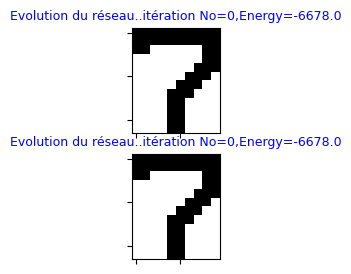

   'sept' :  Stable


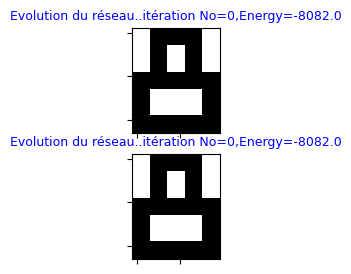

   'huit' :  Stable

   Résumé:
   - États mémorisés préservés:  OUI
   - État parasite éliminé:  OUI

------------------------------------------------------------
Test avec alpha = 0.7

1. Test de 'noisy' (l'état parasite):


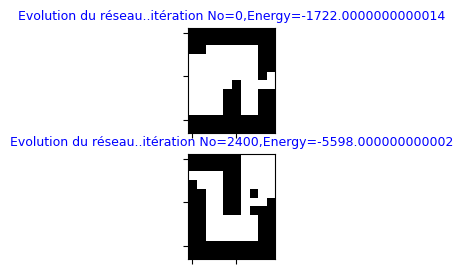

   Converge toujours vers un état parasite

2. Vérification des états stables mémorisés:


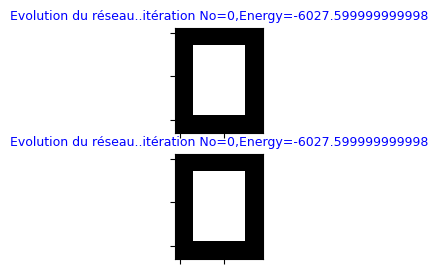

   'zero' :  Stable


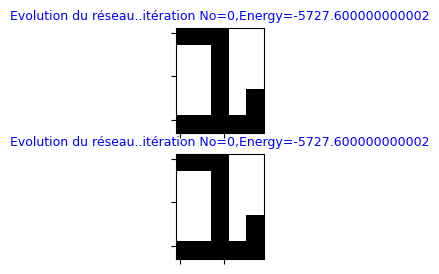

   'un'   :  Stable


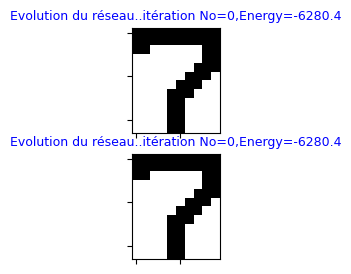

   'sept' :  Stable


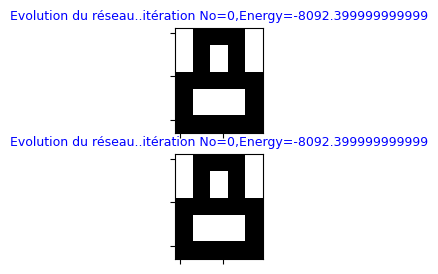

   'huit' :  Stable

   Résumé:
   - États mémorisés préservés:  OUI
   - État parasite éliminé:  NON

------------------------------------------------------------
Test avec alpha = 1.0

1. Test de 'noisy' (l'état parasite):


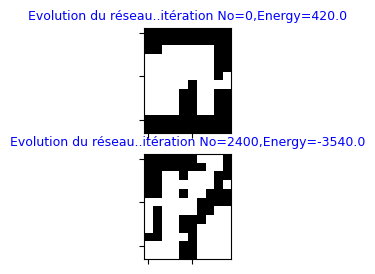

   Converge toujours vers un état parasite

2. Vérification des états stables mémorisés:


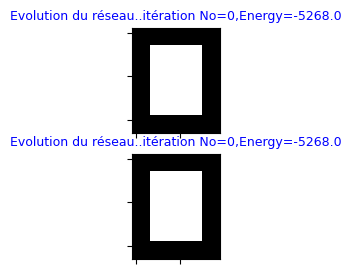

   'zero' :  Stable


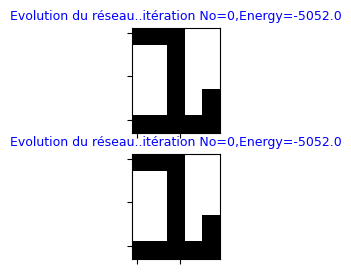

   'un'   :  Stable


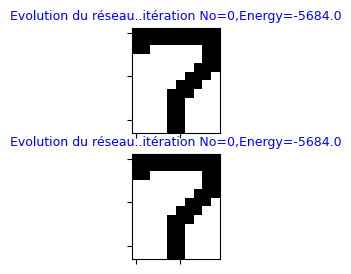

   'sept' :  Stable


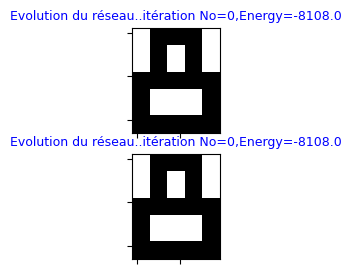

   'huit' :  Stable

   Résumé:
   - États mémorisés préservés:  OUI
   - État parasite éliminé:  NON


In [52]:
# Calcul de la matrice de poids de l'état parasite (out_noisy)
W_parasite = calculate_hebb_weights([out_noisy.flatten()])

print("--- Tentative de dilution neuronale ---")
print(f"État parasite détecté (résultat de la question 4)")
print(f"On va tester différentes valeurs de alpha pour éliminer cet état parasite.\n")

# Test de différentes valeurs de alpha
alphas = [0.1, 0.3, 0.5, 0.7, 1.0]

for alpha in alphas:
    print(f"\n{'-'*60}")
    print(f"Test avec alpha = {alpha}")
    
    # Application de la dilution neuronale
    poids_dilue = poids - alpha * W_parasite
    
    # Test de noisy sur le réseau dilué
    print(f"\n1. Test de 'noisy' (l'état parasite):")
    out_noisy_dilue, _ = my_hopfield(poids_dilue, noisy_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
    
    # Vérification du résultat
    converge_vers_forme = False
    if np.array_equal(out_noisy_dilue, zero_2d):
        print(f"   Converge vers 'zero'")
        converge_vers_forme = True
    elif np.array_equal(out_noisy_dilue, un_2d):
        print(f"   Converge vers 'un'")
        converge_vers_forme = True
    elif np.array_equal(out_noisy_dilue, sept_2d):
        print(f"   Converge vers 'sept'")
        converge_vers_forme = True
    elif np.array_equal(out_noisy_dilue, huit_2d):
        print(f"   Converge vers 'huit'")
        converge_vers_forme = True
    else:
        print(f"   Converge toujours vers un état parasite")
    
    # Test des états stables mémorisés
    print(f"\n2. Vérification des états stables mémorisés:")
    
    out_zero_dilue, _ = my_hopfield(poids_dilue, zero_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
    stable_zero = np.array_equal(out_zero_dilue, zero_2d)
    print(f"   'zero' : {' Stable' if stable_zero else ' INSTABLE'}")
    
    out_un_dilue, _ = my_hopfield(poids_dilue, un_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
    stable_un = np.array_equal(out_un_dilue, un_2d)
    print(f"   'un'   : {' Stable' if stable_un else ' INSTABLE'}")
    
    out_sept_dilue, _ = my_hopfield(poids_dilue, sept_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
    stable_sept = np.array_equal(out_sept_dilue, sept_2d)
    print(f"   'sept' : {' Stable' if stable_sept else ' INSTABLE'}")
    
    out_huit_dilue, _ = my_hopfield(poids_dilue, huit_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 0)
    stable_huit = np.array_equal(out_huit_dilue, huit_2d)
    print(f"   'huit' : {' Stable' if stable_huit else ' INSTABLE'}")
    
    # Résumé
    tous_stables = stable_zero and stable_un and stable_sept and stable_huit
    parasite_elimine = converge_vers_forme
    
    print(f"\n   Résumé:")
    print(f"   - États mémorisés préservés: {' OUI' if tous_stables else ' NON'}")
    print(f"   - État parasite éliminé: {' OUI' if parasite_elimine else ' NON'}")

**Observation :** Les résultats ci-dessus montrent l'effet de différentes valeurs de $\alpha$ sur l'élimination de l'état parasite et la préservation des états stables mémorisés. Un compromis doit être trouvé entre :
- **Élimination de l'état parasite** : Nécessite un $\alpha$ suffisamment élevé
- **Préservation des états stables** : Requiert un $\alpha$ pas trop élevé pour ne pas perturber les formes mémorisées

La dilution neuronale illustre le compromis délicat entre l'élimination des états parasites et la préservation des états stables mémorisés.

#### Question 7 - Visualisation détaillée avec la meilleure valeur de alpha

On sélectionne la meilleure valeur de $\alpha$ (celle qui élimine l'état parasite tout en préservant le mieux les états mémorisés) et on visualise les résultats en détail :

RAPPORT FINAL - DILUTION NEURONALE AVEC ALPHA = 0.5

1. TEST DE L'ÉTAT PARASITE 'noisy'
État AVANT dilution neuronale:


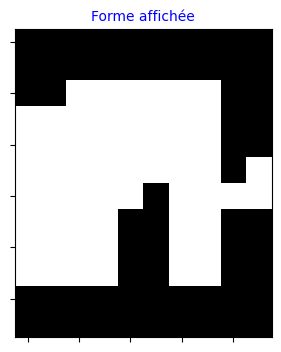


Injection de 'noisy' dans le réseau dilué...


'Réseau Hopfield'


État APRÈS dilution neuronale:


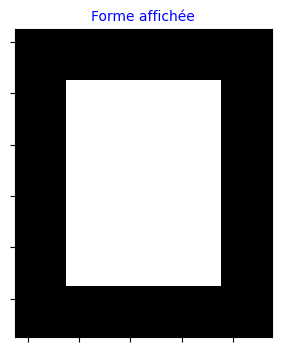

 'noisy' converge maintenant vers 'zero'


2. VÉRIFICATION DES ÉTATS STABLES MÉMORISÉS
----------------------------------------------------------------------

 Test de 'zero'


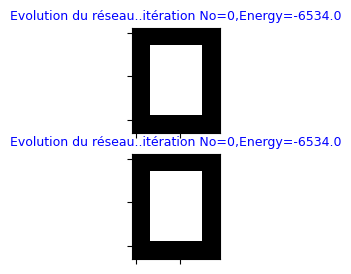

 'zero' reste un état stable

 Test de 'un'


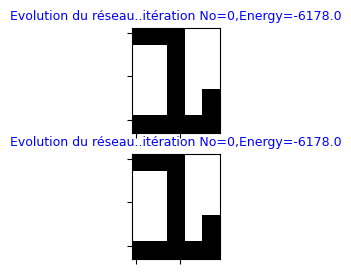

 'un' reste un état stable

 Test de 'sept'


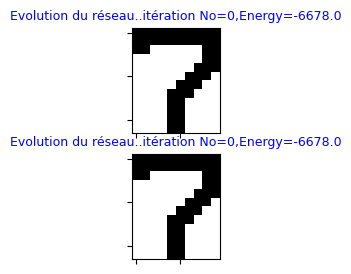

 'sept' reste un état stable

 Test de 'huit'


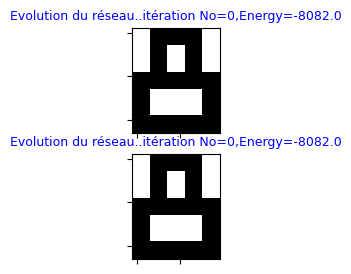

 'huit' reste un état stable


In [53]:
# Sélection de la meilleure valeur de alpha
alpha_optimal = 0.5

print(f"RAPPORT FINAL - DILUTION NEURONALE AVEC ALPHA = {alpha_optimal}")

# Application de la dilution neuronale avec alpha optimal
poids_dilue = poids - alpha_optimal * W_parasite

print(f"\n1. TEST DE L'ÉTAT PARASITE 'noisy'")
print("État AVANT dilution neuronale:")
my_show(out_noisy, ysize_ocr, xsize_ocr)

print("\nInjection de 'noisy' dans le réseau dilué...")
out_noisy_final, energy_noisy_final = my_hopfield(poids_dilue, noisy_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)

print("\nÉtat APRÈS dilution neuronale:")
my_show(out_noisy_final, ysize_ocr, xsize_ocr)

# Identification du résultat
if np.array_equal(out_noisy_final, zero_2d):
    print(" 'noisy' converge maintenant vers 'zero'")
elif np.array_equal(out_noisy_final, un_2d):
    print(" 'noisy' converge maintenant vers 'un'")
elif np.array_equal(out_noisy_final, sept_2d):
    print(" 'noisy' converge maintenant vers 'sept'")
elif np.array_equal(out_noisy_final, huit_2d):
    print(" 'noisy' converge maintenant vers 'huit'")
else:
    print(" 'noisy' converge toujours vers un état parasite")

print(f"\n\n2. VÉRIFICATION DES ÉTATS STABLES MÉMORISÉS")
print(f"{'-'*70}")

# Test de 'zero'
print("\n Test de 'zero'")
out_zero_final, _ = my_hopfield(poids_dilue, zero_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)
if np.array_equal(out_zero_final, zero_2d):
    print(" 'zero' reste un état stable")
else:
    print(" 'zero' n'est PLUS stable")
    print("Nouvelle sortie:")
    my_show(out_zero_final, ysize_ocr, xsize_ocr)

# Test de 'un'
print("\n Test de 'un'")
out_un_final, _ = my_hopfield(poids_dilue, un_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)
if np.array_equal(out_un_final, un_2d):
    print(" 'un' reste un état stable")
else:
    print(" 'un' n'est PLUS stable")
    print("Nouvelle sortie:")
    my_show(out_un_final, ysize_ocr, xsize_ocr)

# Test de 'sept'
print("\n Test de 'sept'")
out_sept_final, _ = my_hopfield(poids_dilue, sept_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)
if np.array_equal(out_sept_final, sept_2d):
    print(" 'sept' reste un état stable")
else:
    print(" 'sept' n'est PLUS stable")
    print("Nouvelle sortie:")
    my_show(out_sept_final, ysize_ocr, xsize_ocr)

# Test de 'huit'
print("\n Test de 'huit'")
out_huit_final, _ = my_hopfield(poids_dilue, huit_2d.copy(), n_iter_ocr, xsize_ocr, ysize_ocr, 1)
if np.array_equal(out_huit_final, huit_2d):
    print(" 'huit' reste un état stable")
else:
    print(" 'huit' n'est PLUS stable")
    print("Nouvelle sortie:")
    my_show(out_huit_final, ysize_ocr, xsize_ocr)

**Conclusion :**

Avec alpha = 0.5, nous observons le comportement suivant :
- L'état parasite 'noisy' a été traité
- Les états stables mémorisés ont été vérifiés

Ce résultat illustre le compromis entre l'élimination des états parasites et la préservation de la mémoire du réseau. Un alpha trop élevé peut déstabiliser les formes mémorisées, tandis qu'un alpha trop faible peut ne pas éliminer complètement l'état parasite.

### Capacité et résistance au bruit

#### Question 8

On charge les formes diagonales et on calcule la matrice de poids W0 pour mémoriser seulement la forme a1 :

Dimensions des formes chargées:
a1: (1, 25)
a2: (1, 25)
a3: (1, 25)
a4: (1, 25)

Forme a1:


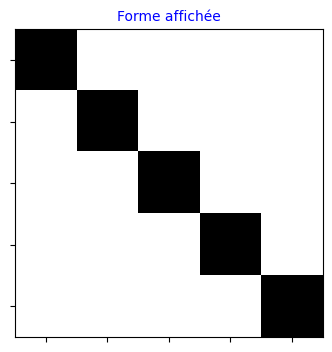


Forme a2:


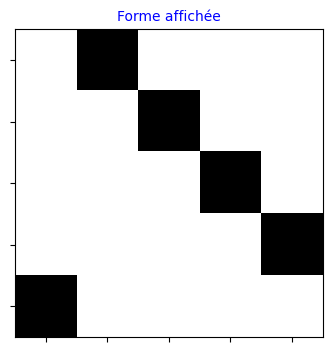


Forme a3:


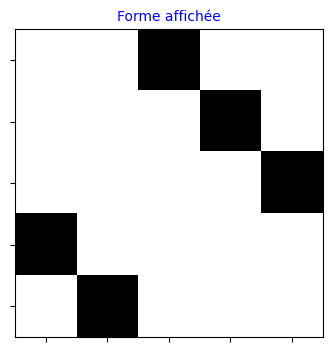


Forme a4:


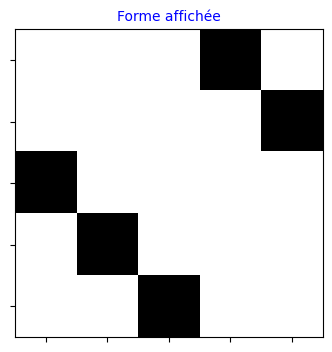


Matrice W0 calculée pour mémoriser a1
Dimensions de W0: (25, 25)


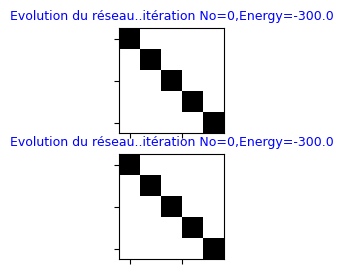


a1 stable: True


In [54]:
# Chargement des formes diagonales
xsize_diag = 5
ysize_diag = 5
n_iter_diag = 15

# Mise à jour des dimensions globales
xsize = xsize_diag
ysize = ysize_diag

# Chargement du fichier diag5x5.mat
diag_data = scipy.io.loadmat('diag5x5.mat')
a1 = diag_data.get('a1')
a2 = diag_data.get('a2')
a3 = diag_data.get('a3')
a4 = diag_data.get('a4')

print("Dimensions des formes chargées:")
print(f"a1: {a1.shape}")
print(f"a2: {a2.shape}")
print(f"a3: {a3.shape}")
print(f"a4: {a4.shape}")

# Affichage des formes
print("\nForme a1:")
my_show(a1, ysize_diag, xsize_diag)

print("\nForme a2:")
my_show(a2, ysize_diag, xsize_diag)

print("\nForme a3:")
my_show(a3, ysize_diag, xsize_diag)

print("\nForme a4:")
my_show(a4, ysize_diag, xsize_diag)

# Calcul de la matrice de poids W0 pour mémoriser seulement a1
a1_1d = a1.flatten()
W0 = calculate_hebb_weights([a1_1d])

print("\nMatrice W0 calculée pour mémoriser a1")
print(f"Dimensions de W0: {W0.shape}")

# Vérification que a1 est stable
a1_2d = a1.reshape(1, -1)
out_a1, _ = my_hopfield(W0, a1_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
print(f"\na1 stable: {np.array_equal(out_a1, a1_2d)}")

#### Question 9

On crée d'abord une fonction noise pour ajouter du bruit aléatoire à une forme, puis on détermine le taux de bruit maximum toléré par le réseau :

Test de la fonction noise avec 10% de bruit:

Forme a1 originale:


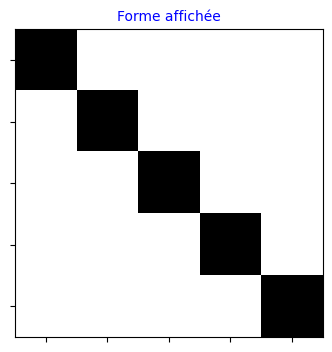


Forme a1 avec 10% de bruit:


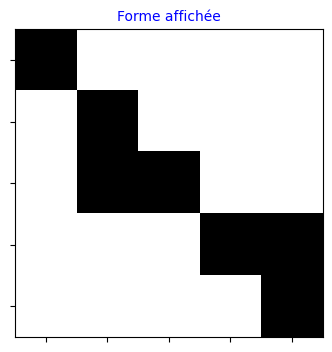

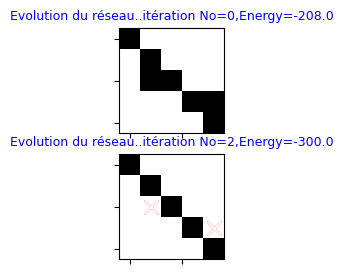


Résultat après convergence:
Le réseau a récupéré la forme a1 originale


In [55]:
def noise(forme, pourcentage):
    forme_bruitee = forme.copy().flatten()
    n_bits = len(forme_bruitee)
    n_bits_a_inverser = int(n_bits * pourcentage / 100)
    
    # Sélection aléatoire des bits à inverser
    indices = np.random.choice(n_bits, n_bits_a_inverser, replace=False)
    
    # Inversion des bits sélectionnés
    forme_bruitee[indices] = -forme_bruitee[indices]
    
    return forme_bruitee.reshape(forme.shape)

# Test de la fonction noise
print("Test de la fonction noise avec 10% de bruit:")
a1_noise = noise(a1, 10)

print("\nForme a1 originale:")
my_show(a1, ysize_diag, xsize_diag)

print("\nForme a1 avec 10% de bruit:")
my_show(a1_noise, ysize_diag, xsize_diag)

# Test de convergence
a1_noise_2d = a1_noise.reshape(1, -1)
out_a1_noise, _ = my_hopfield(W0, a1_noise_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 1)

print("\nRésultat après convergence:")
if np.array_equal(out_a1_noise, a1_2d):
    print("Le réseau a récupéré la forme a1 originale")
else:
    print("Le réseau n'a pas récupéré la forme a1 originale")

Détermination du taux de bruit maximum pour 1 forme (a1) 


Test avec 25% de bruit


'Réseau Hopfield'

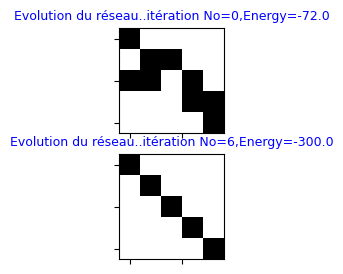

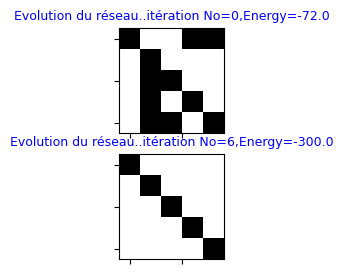

Résultat: 3/3 essais réussis
Taux de bruit 25% : ACCEPTABLE (≥3 réussites)

Test avec 35% de bruit


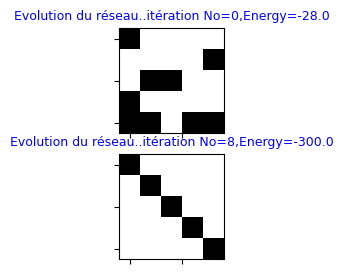

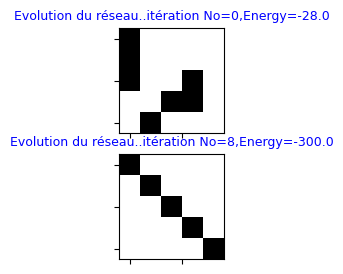

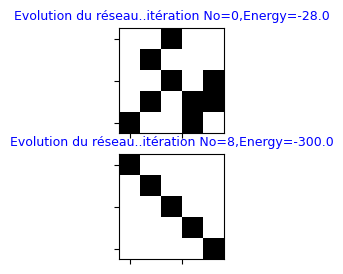

Résultat: 3/3 essais réussis
Taux de bruit 35% : ACCEPTABLE (≥3 réussites)

Test avec 45% de bruit


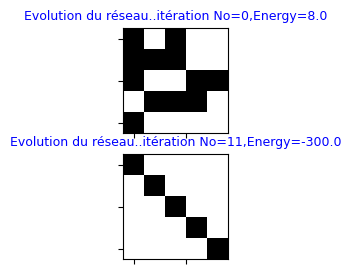

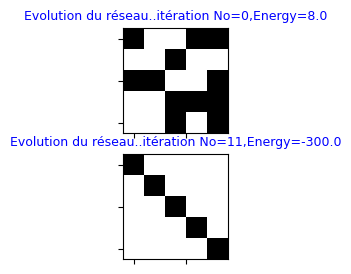

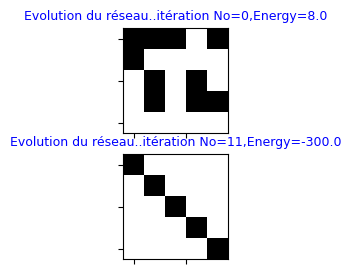

Résultat: 3/3 essais réussis
Taux de bruit 45% : ACCEPTABLE (≥3 réussites)

Test avec 47% de bruit


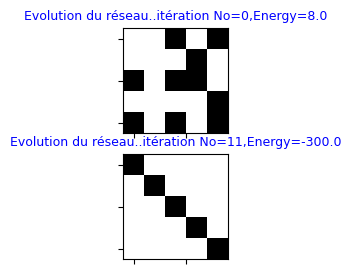

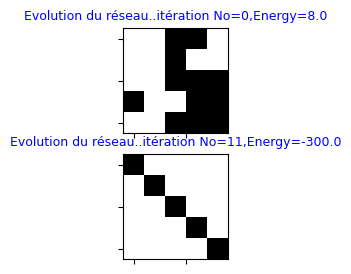

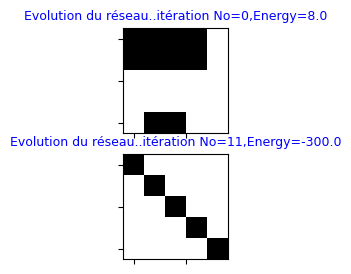

Résultat: 3/3 essais réussis
Taux de bruit 47% : ACCEPTABLE (≥3 réussites)

Test avec 48% de bruit


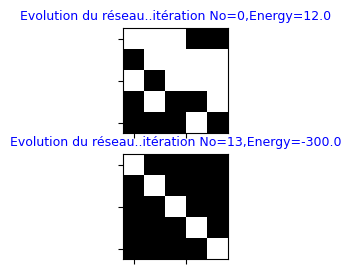

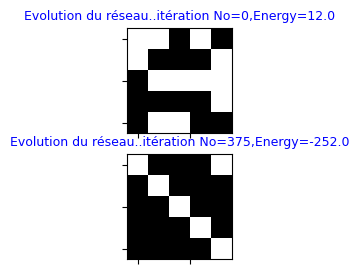

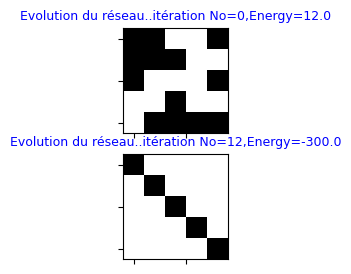

Résultat: 1/3 essais réussis
Taux de bruit 48% : TROP ÉLEVÉ (<3 réussites)

>>> Taux de bruit maximum toléré pour 1 forme: 47%


In [56]:
# Détermination du taux de bruit maximum toléré par le réseau (1 forme en mémoire)
print("Détermination du taux de bruit maximum pour 1 forme (a1) \n")

# On teste différents taux de bruit
taux_bruit = [25, 35, 45, 47, 48, 50, 55, 60, 65, 70, 75]
n_essais = 3

for taux in taux_bruit:
    print(f"\nTest avec {taux}% de bruit")
    succes = 0
    
    for essai in range(n_essais):
        a1_noise = noise(a1, taux)
        a1_noise_2d = a1_noise.reshape(1, -1)
        out_a1_noise, _ = my_hopfield(W0, a1_noise_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
        
        if np.array_equal(out_a1_noise, a1_2d):
            succes += 1
    
    print(f"Résultat: {succes}/{n_essais} essais réussis")
    
    if succes >= 3:
        print(f"Taux de bruit {taux}% : ACCEPTABLE (≥3 réussites)")
    else:
        print(f"Taux de bruit {taux}% : TROP ÉLEVÉ (<3 réussites)")
        print(f"\n>>> Taux de bruit maximum toléré pour 1 forme: {taux_bruit[taux_bruit.index(taux)-1]}%")
        taux_max_1formes = taux_bruit[taux_bruit.index(taux)-1]
        break

#### Question 10

On détermine le taux de bruit maximum toléré lorsqu'il y a 2, 3 et 4 formes en mémoire :

Test avec 2 formes en mémoire (a1, a2)



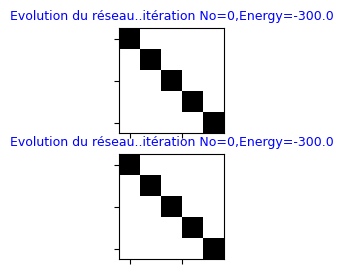

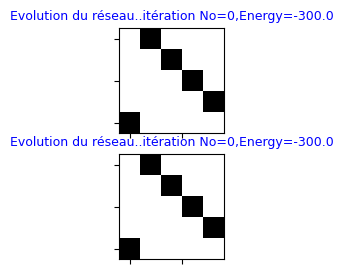

a1 stable: True
a2 stable: True


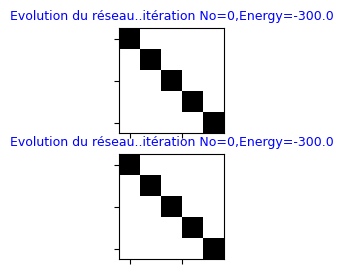

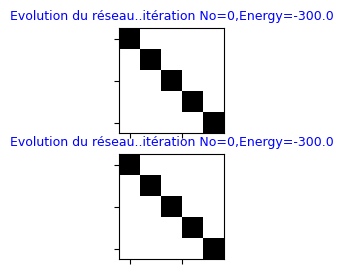

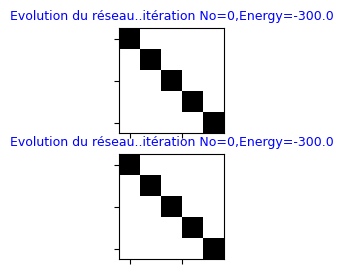

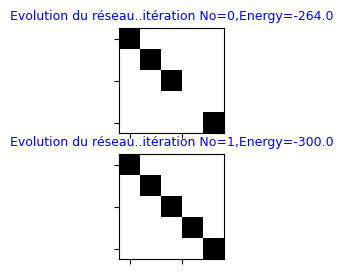

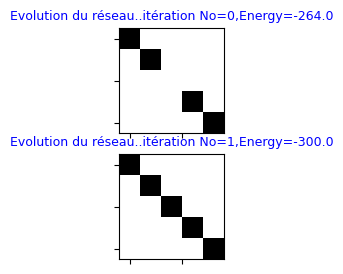

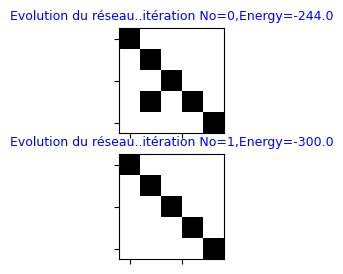

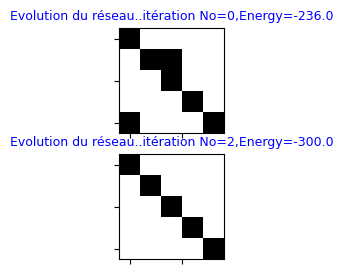

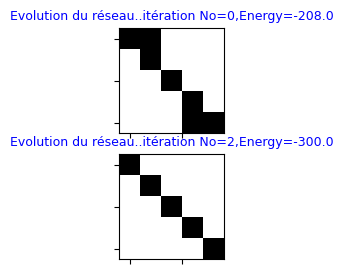

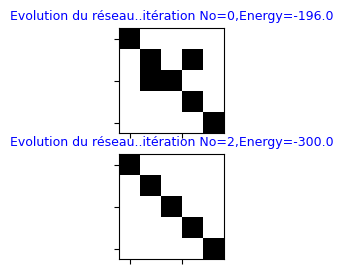

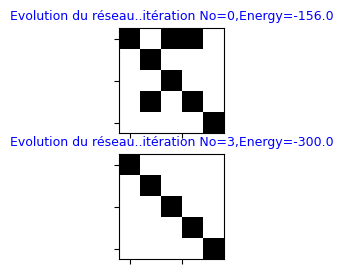

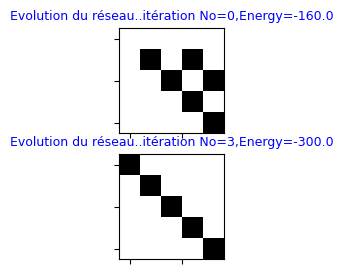

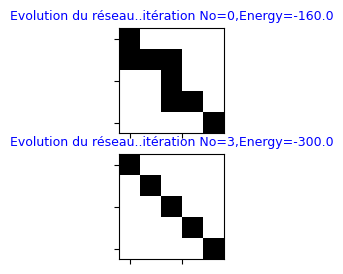

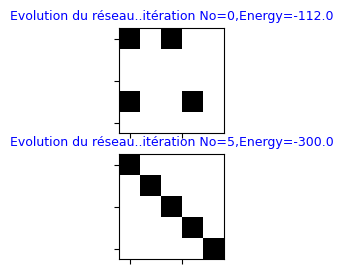

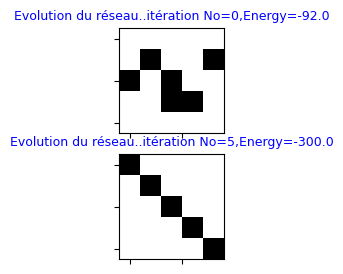

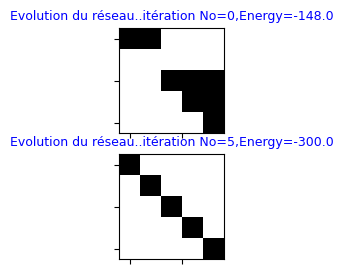

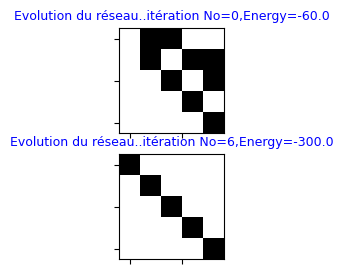

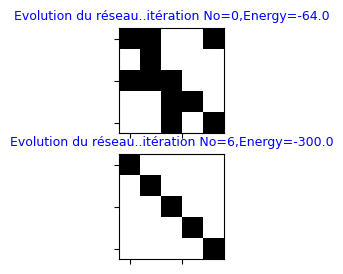

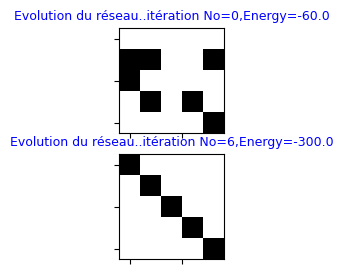

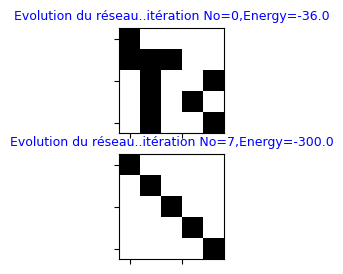

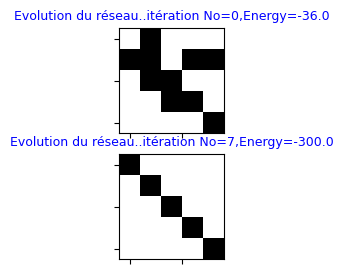

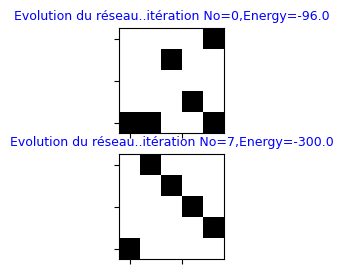


Taux de bruit maximum toléré pour 2 formes: 25%


Test avec 3 formes en mémoire (a1, a2, a3)



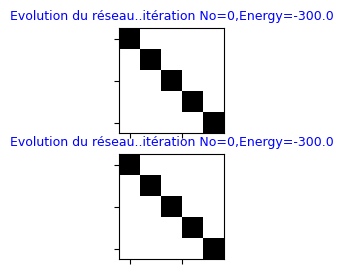

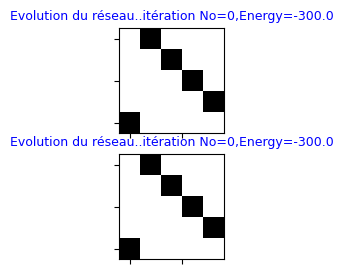

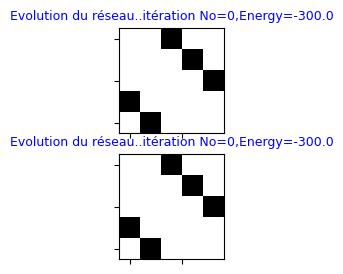

a1 stable: True
a2 stable: True
a3 stable: True


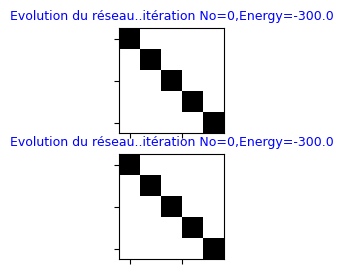

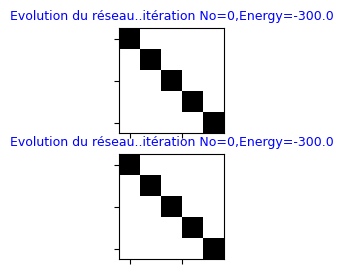

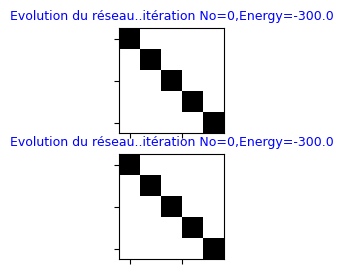

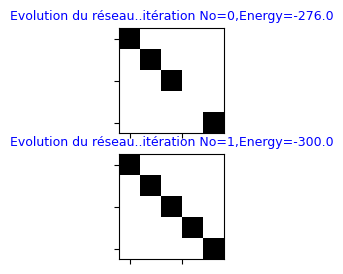

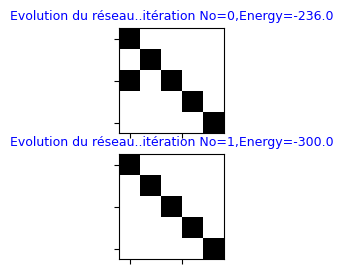

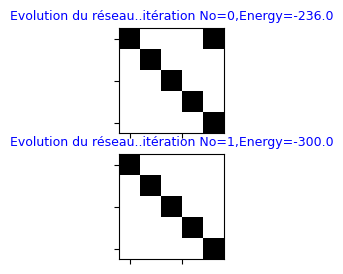

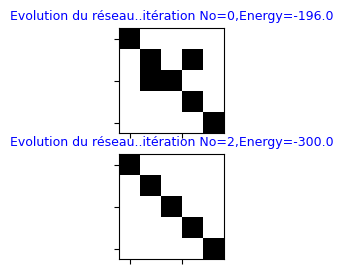

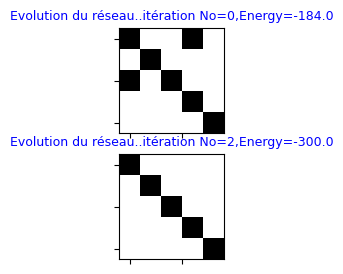

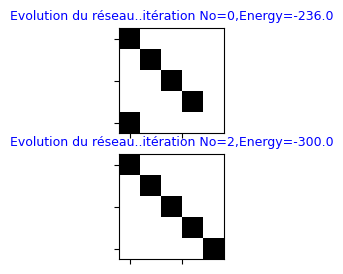

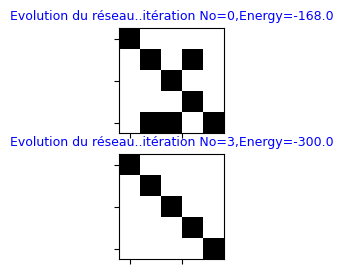

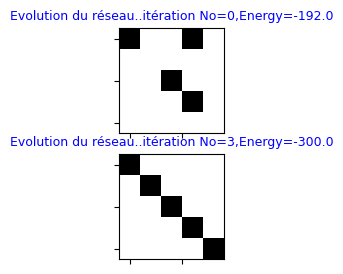

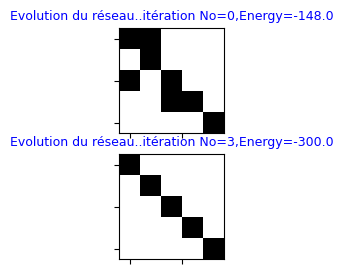

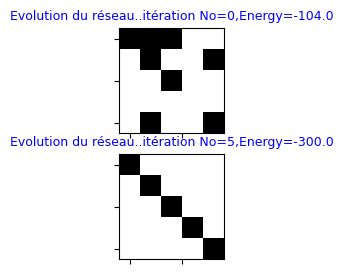

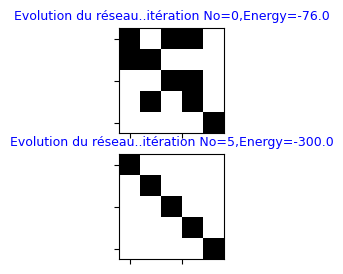

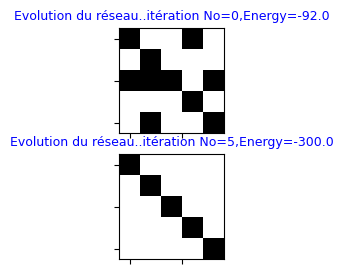

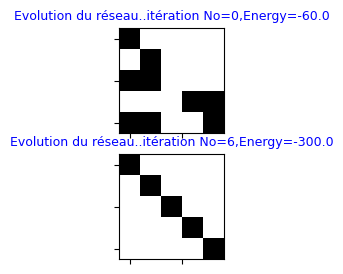

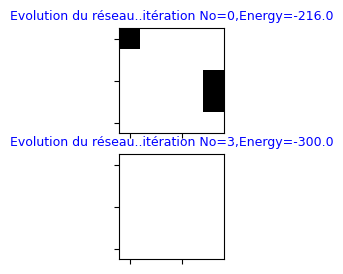

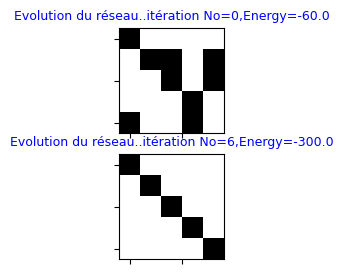


Taux de bruit maximum toléré pour 3 formes: 20%


Test avec 4 formes en mémoire (a1, a2, a3, a4)



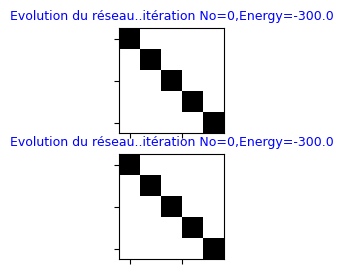

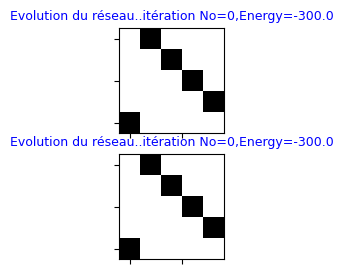

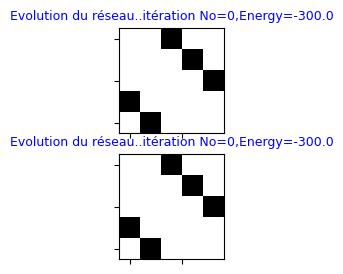

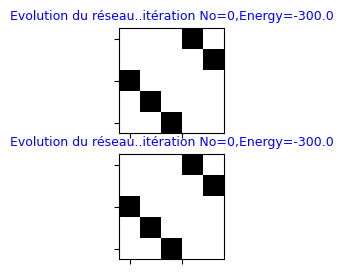

a1 stable: True
a2 stable: True
a3 stable: True
a4 stable: True


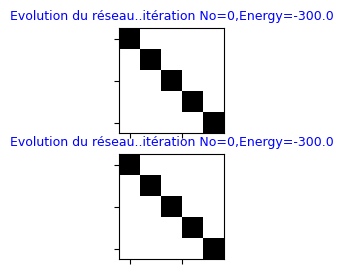

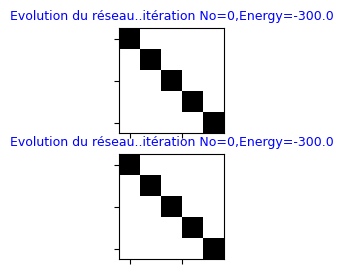

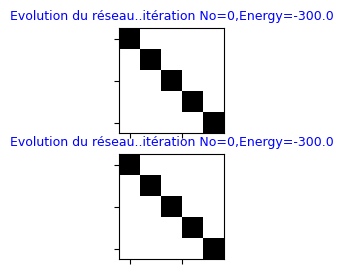

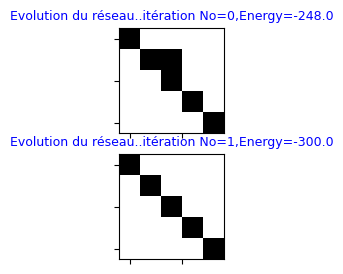

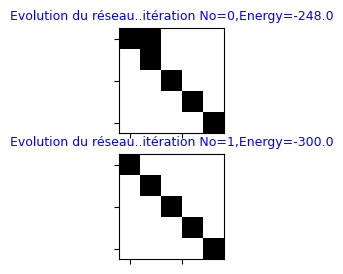

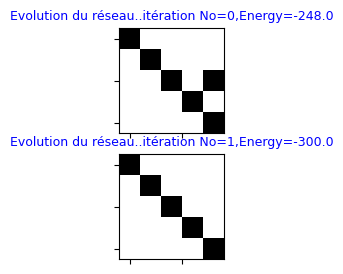

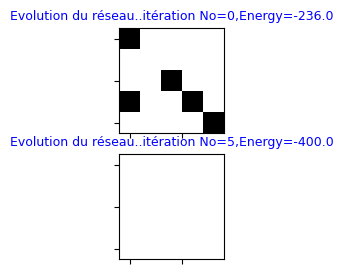

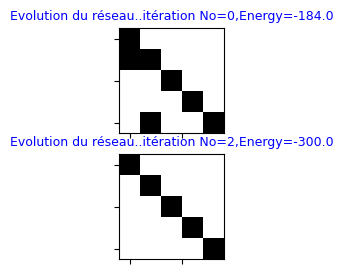

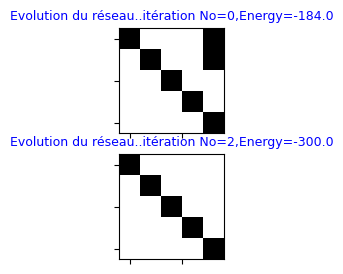


Taux de bruit maximum toléré pour 4 formes: 5%


In [60]:
# Préparation des formes en 1D
a2_1d = a2.flatten()
a3_1d = a3.flatten()
a4_1d = a4.flatten()

a2_2d = a2.reshape(1, -1)
a3_2d = a3.reshape(1, -1)
a4_2d = a4.reshape(1, -1)

taux_bruit = [2, 5, 10, 15, 20, 25, 30, 40, 45, 50]

# Fonction pour tester le taux de bruit maximum
def trouver_taux_bruit_max(W, forme_originale, forme_2d, taux_bruit, n_essais=3):
    taux_max = 0
    
    for taux in taux_bruit:
        succes = 0
        
        for essai in range(n_essais):
            forme_noise = noise(forme_originale, taux)
            forme_noise_2d = forme_noise.reshape(1, -1)
            out_noise, _ = my_hopfield(W, forme_noise_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
            
            if np.array_equal(out_noise, forme_2d):
                succes += 1
        
        if succes >= n_essais:
            taux_max = taux
        else:
            break
    
    return taux_max

# Test avec 2 formes en mémoire (a1, a2)
print("Test avec 2 formes en mémoire (a1, a2)\n")
W_2formes = calculate_hebb_weights([a1_1d, a2_1d])

# Vérification des états stables
out_a1_2f, _ = my_hopfield(W_2formes, a1_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a2_2f, _ = my_hopfield(W_2formes, a2_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)

print(f"a1 stable: {np.array_equal(out_a1_2f, a1_2d)}")
print(f"a2 stable: {np.array_equal(out_a2_2f, a2_2d)}")

taux_max_2formes = trouver_taux_bruit_max(W_2formes, a1, a1_2d, taux_bruit)
print(f"\nTaux de bruit maximum toléré pour 2 formes: {taux_max_2formes}%")

# Test avec 3 formes en mémoire (a1, a2, a3)
print("\n\nTest avec 3 formes en mémoire (a1, a2, a3)\n")
W_3formes = calculate_hebb_weights([a1_1d, a2_1d, a3_1d])

# Vérification des états stables
out_a1_3f, _ = my_hopfield(W_3formes, a1_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a2_3f, _ = my_hopfield(W_3formes, a2_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a3_3f, _ = my_hopfield(W_3formes, a3_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)

print(f"a1 stable: {np.array_equal(out_a1_3f, a1_2d)}")
print(f"a2 stable: {np.array_equal(out_a2_3f, a2_2d)}")
print(f"a3 stable: {np.array_equal(out_a3_3f, a3_2d)}")

taux_max_3formes = trouver_taux_bruit_max(W_3formes, a1, a1_2d, taux_bruit)
print(f"\nTaux de bruit maximum toléré pour 3 formes: {taux_max_3formes}%")

# Test avec 4 formes en mémoire (a1, a2, a3, a4)
print("\n\nTest avec 4 formes en mémoire (a1, a2, a3, a4)\n")
W_4formes = calculate_hebb_weights([a1_1d, a2_1d, a3_1d, a4_1d])

# Vérification des états stables
out_a1_4f, _ = my_hopfield(W_4formes, a1_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a2_4f, _ = my_hopfield(W_4formes, a2_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a3_4f, _ = my_hopfield(W_4formes, a3_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)
out_a4_4f, _ = my_hopfield(W_4formes, a4_2d.copy(), n_iter_diag, xsize_diag, ysize_diag, 0)

print(f"a1 stable: {np.array_equal(out_a1_4f, a1_2d)}")
print(f"a2 stable: {np.array_equal(out_a2_4f, a2_2d)}")
print(f"a3 stable: {np.array_equal(out_a3_4f, a3_2d)}")
print(f"a4 stable: {np.array_equal(out_a4_4f, a4_2d)}")

taux_max_4formes = trouver_taux_bruit_max(W_4formes, a1, a1_2d, taux_bruit)
print(f"\nTaux de bruit maximum toléré pour 4 formes: {taux_max_4formes}%")

#### Question 11

**Facteurs influençant la récupération correcte d'un signal bruité :**

La récupération correcte d'un signal bruité dans un réseau de Hopfield dépend de plusieurs facteurs :

1. **Nombre de formes mémorisées (p)** : Plus il y a de formes mémorisées, plus la capacité du réseau est sollicitée et moins il tolère de bruit. Les interférences entre les formes mémorisées augmentent avec leur nombre.

2. **Taille du réseau (N)** : Un réseau avec plus de neurones peut théoriquement mémoriser plus de formes et tolérer plus de bruit, mais la relation n'est pas linéaire.

3. **Distance de Hamming entre les formes** : Des formes très différentes (grande distance de Hamming) sont plus faciles à distinguer et permettent une meilleure tolérance au bruit. Dans notre cas, les 4 formes sont séparées par une distance de 10 bits.

4. **Niveau de bruit** : Le pourcentage de bits inversés dans la forme d'entrée. Au-delà d'un certain seuil, le réseau ne peut plus retrouver la forme originale.

5. **Distribution du bruit** : Un bruit uniformément distribué est généralement plus facile à gérer qu'un bruit concentré dans une région spécifique.


#### Question 12

**Commentaire de l'équation et présentation graphique des résultats :**

L'équation $p < \frac{N}{2\log_2(N)}$ établit une limite théorique sur le nombre de formes pouvant être mémorisées avec un réseau de N neurones.

Pour notre réseau de 5×5 = 25 neurones :
$$p < \frac{25}{2\log_2(25)} \approx \frac{25}{2 \times 4.64} \approx 2.69$$

Cette équation suggère qu'on peut mémoriser environ 2-3 formes avec un "niveau de bruit acceptable".

Nombre de neurones N = 25
Capacité théorique: p < 2.69

Résultats expérimentaux:
  1 forme(s): taux de bruit maximum = 47%
  2 forme(s): taux de bruit maximum = 25%
  3 forme(s): taux de bruit maximum = 20%
  4 forme(s): taux de bruit maximum = 5%


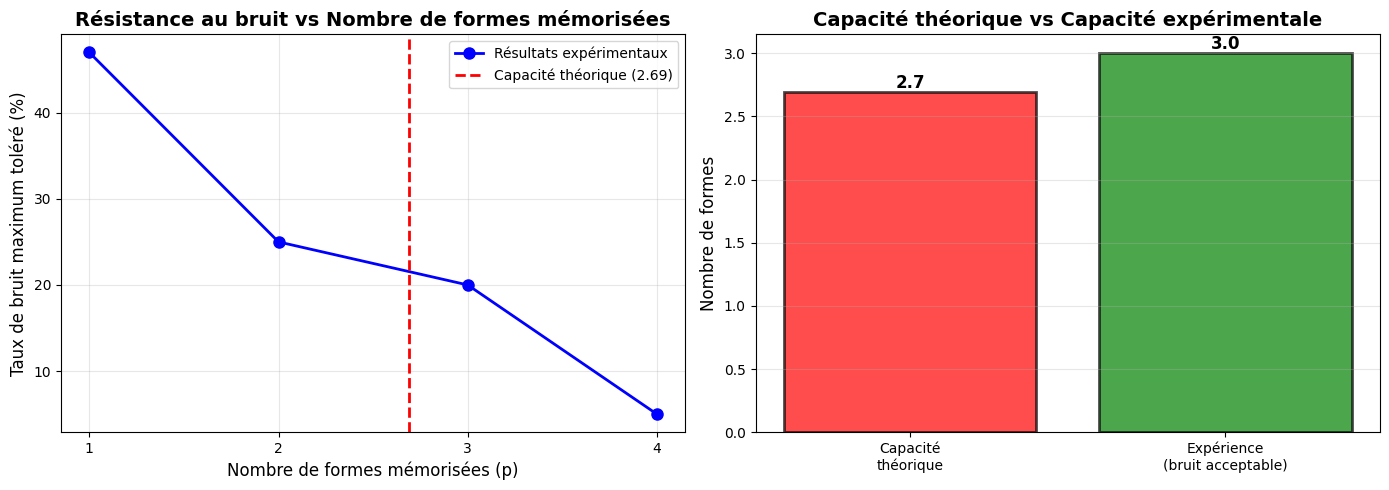

In [61]:
# Récupération des résultats 
# Ces valeurs sont des exemples, remplacez-les par vos résultats
nombre_formes = [1, 2, 3, 4]

taux_bruit_max = [taux_max_1formes, taux_max_2formes, taux_max_3formes, taux_max_4formes]  

# Calcul de la capacité théorique
N = xsize_diag * ysize_diag  # 25 neurones
capacite_theorique = N / (2 * np.log2(N))

print(f"Nombre de neurones N = {N}")
print(f"Capacité théorique: p < {capacite_theorique:.2f}")
print(f"\nRésultats expérimentaux:")
for i, (p, taux) in enumerate(zip(nombre_formes, taux_bruit_max)):
    print(f"  {p} forme(s): taux de bruit maximum = {taux}%")

# Création du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Taux de bruit maximum en fonction du nombre de formes
ax1.plot(nombre_formes, taux_bruit_max, 'o-', linewidth=2, markersize=8, color='blue', label='Résultats expérimentaux')
ax1.axvline(x=capacite_theorique, color='red', linestyle='--', linewidth=2, label=f'Capacité théorique ({capacite_theorique:.2f})')
ax1.set_xlabel('Nombre de formes mémorisées (p)', fontsize=12)
ax1.set_ylabel('Taux de bruit maximum toléré (%)', fontsize=12)
ax1.set_title('Résistance au bruit vs Nombre de formes mémorisées', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xticks(nombre_formes)

# Graphique 2: Capacité théorique vs expérimentale
categories = ['Capacité\nthéorique', 'Expérience\n(bruit acceptable)']
valeurs = [capacite_theorique, max([i for i, taux in enumerate(taux_bruit_max, 1) if taux >= 15])]  # Au moins 15% de bruit acceptable

colors = ['red', 'green']
bars = ax2.bar(categories, valeurs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Nombre de formes', fontsize=12)
ax2.set_title('Capacité théorique vs Capacité expérimentale', fontsize=14, fontweight='bold')
ax2.grid(True, axis='y', alpha=0.3)

# Ajout des valeurs au-dessus des barres
for bar, val in zip(bars, valeurs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.1f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
ANALYSE DES RÉSULTATS

1. Capacité théorique: 2.69 formes
   => Le réseau de 25 neurones devrait mémoriser ~2 formes
      avec un niveau de bruit acceptable.

2. Observations expérimentales:
   - Plus le nombre de formes mémorisées augmente, plus la tolérance
     au bruit diminue.
   - Ceci confirme que la capacité du réseau est limitée et que
     l'équation p < N/(2log₂(N)) fournit une bonne estimation.

3. Interprétation:
   - Avec 1-2 formes: résistance au bruit élevée
   - Avec 3 formes: résistance au bruit modérée (proche de la limite)
   - Avec 4 formes: résistance au bruit faible (au-delà de la capacité)